# **이진분류 모델링: 당뇨병 예측**

<center><img src = "https://github.com/Jangrae/img/blob/master/diabetes.png?raw=true" width=800/></center>

## **1. 환경준비**

### (1) 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (2) 함수 만들기

In [2]:
# 함수 만들기
def dl_history_plot(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss', marker='.')
    plt.plot(history['val_loss'], label='Validation Loss', marker='.')

    plt.title('Learning Curve', size=15, pad=20)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

### (3) 데이터 준비

In [3]:
# 데이터 준비
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**데이터 설명**

- Pregnancies: 임신 횟수
- Glucose: 포도당, 피속에 있는 혈당 수치(mg/dL)(정상: 공복 시 70~100)
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml), 혈당 조절에 중요한 역할
- BMI: 체질량지수(체중(kg)/키(m)^2)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 당뇨병 여부(0 또는 1)

## **2. 데이터 전처리**

- Glucose, BloodPressure, BMI 만 이용하여 Outcome을 예측하는 모델을 만들어 봅니다.

### (1) 데이터 준비

In [4]:
# x, y 분리
target = 'Outcome'
features = ['Glucose', 'BloodPressure', 'BMI']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [ ]:
# 없음

### (3) 데이터 분할

In [5]:
# 학습용, 검증용 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

### (4) 스케일링

In [6]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## **3. 모델링 1: 3개 Feature**

### (1) 모델 선언

In [8]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures,)),
    Dense(1, activation='sigmoid')
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) 모델 학습

In [16]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')

In [17]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=0).history

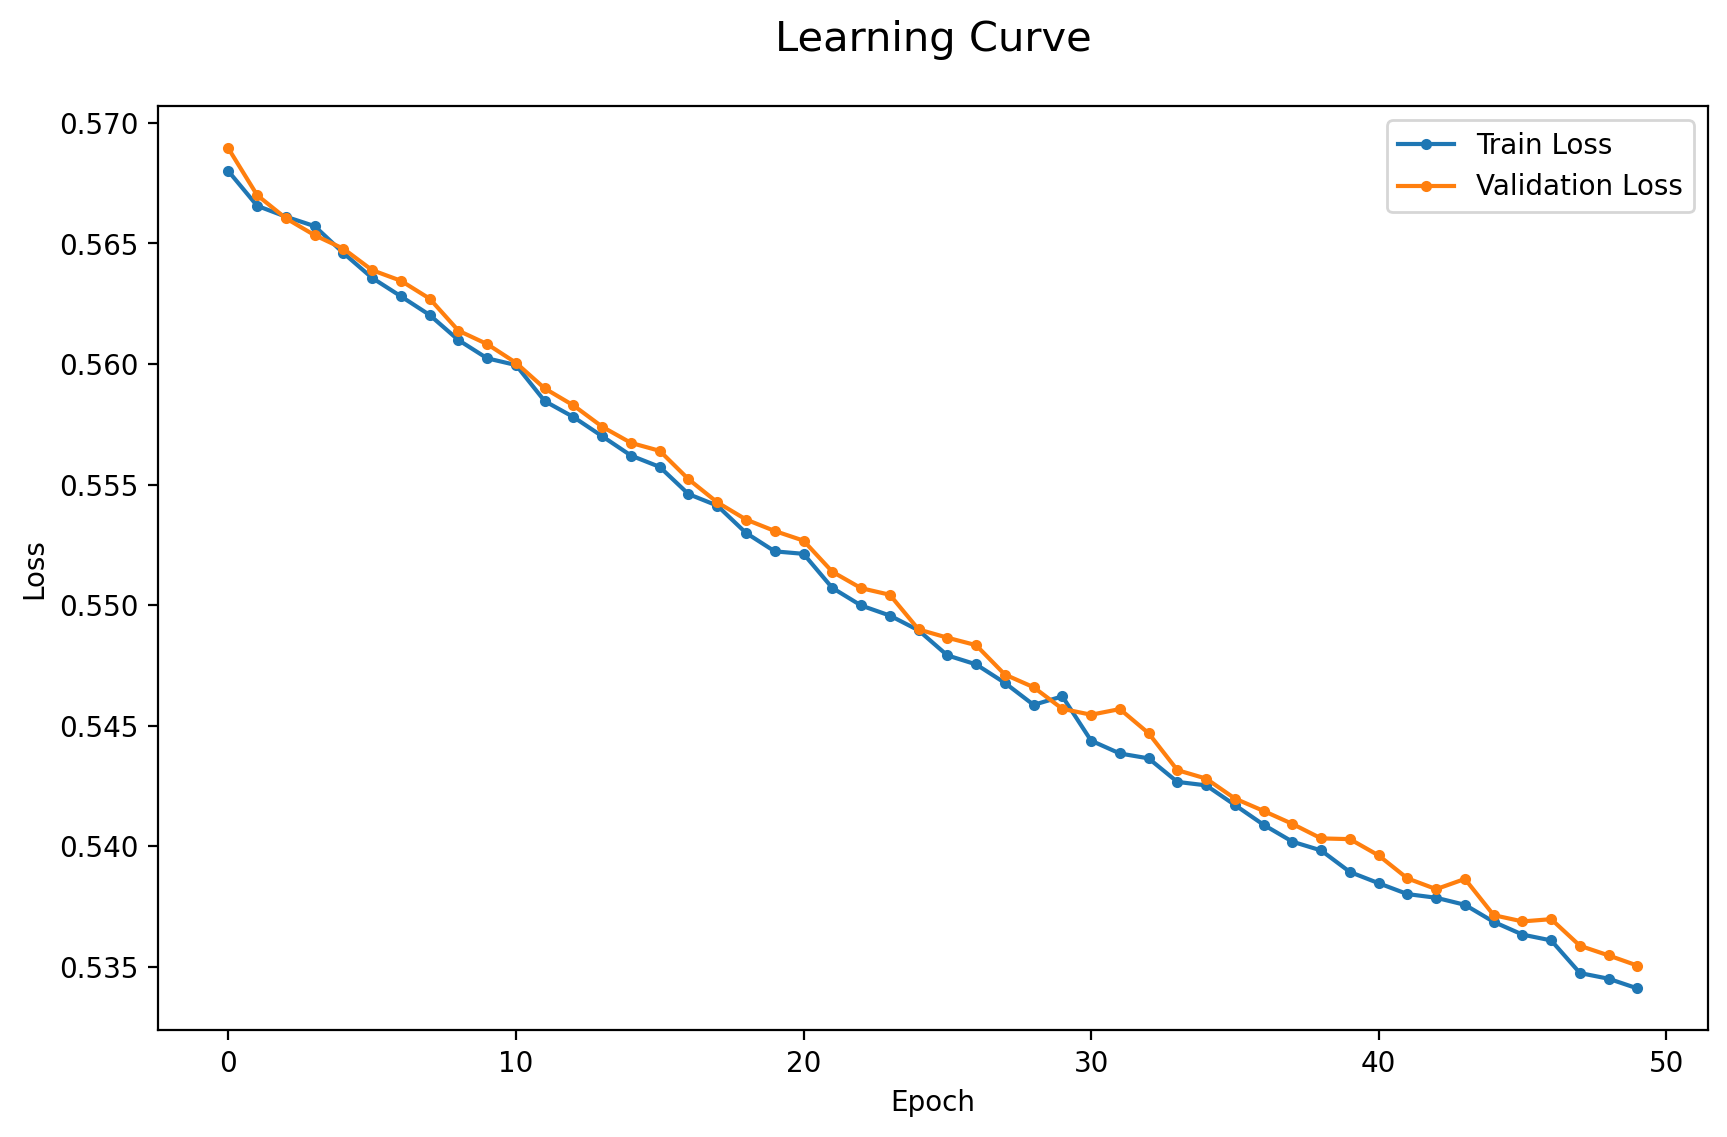

In [18]:
# 학습 곡선
dl_history_plot(hist)

### (3) 예측 및 성능 평가

In [12]:
# 예측
y_pred = model.predict(x_val)
print(y_pred[:5])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
[[0.38443002]
 [0.4636024 ]
 [0.328396  ]
 [0.181566  ]
 [0.32664144]]


- Activation이 Sigmoid이면 결괏값은 0 ~ 1 사이의 확률값입니다.
- 이 값을 0과 1로 변환해야 분류 모델 성능을 평가해 볼 수 있습니다.
- 확률값이 0.5 이상이면 1, 아니면 0으로 변환합니다.

In [19]:
# 확률값 --> 0, 1 변환
y_pred = (y_pred >= 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [20]:
# 성능 평가
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82        99
           1       0.92      0.22      0.35        55

    accuracy                           0.71       154
   macro avg       0.81      0.60      0.58       154
weighted avg       0.78      0.71      0.65       154



## **4. 데이터 전처리**

### (1) 데이터 준비

In [21]:
# x, y 분리
target = 'Outcome'
x = data.drop(columns=target)
y = data.loc[:, target]

### (2) 가변수화

In [22]:
# 없음

### (3) 데이터 분할

In [23]:
# 학습용, 검증용 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

### (4) 스케일링

In [24]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## **5. 모델링 2: 전체 Feature**

- 이제 전체 데이터를 가지고 모델링을 시도해 봅니다.

### (1) 모델 선언

In [25]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures,)),
    Dense(1, activation='sigmoid')
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) 모델 학습

In [26]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy' )

In [27]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0).history

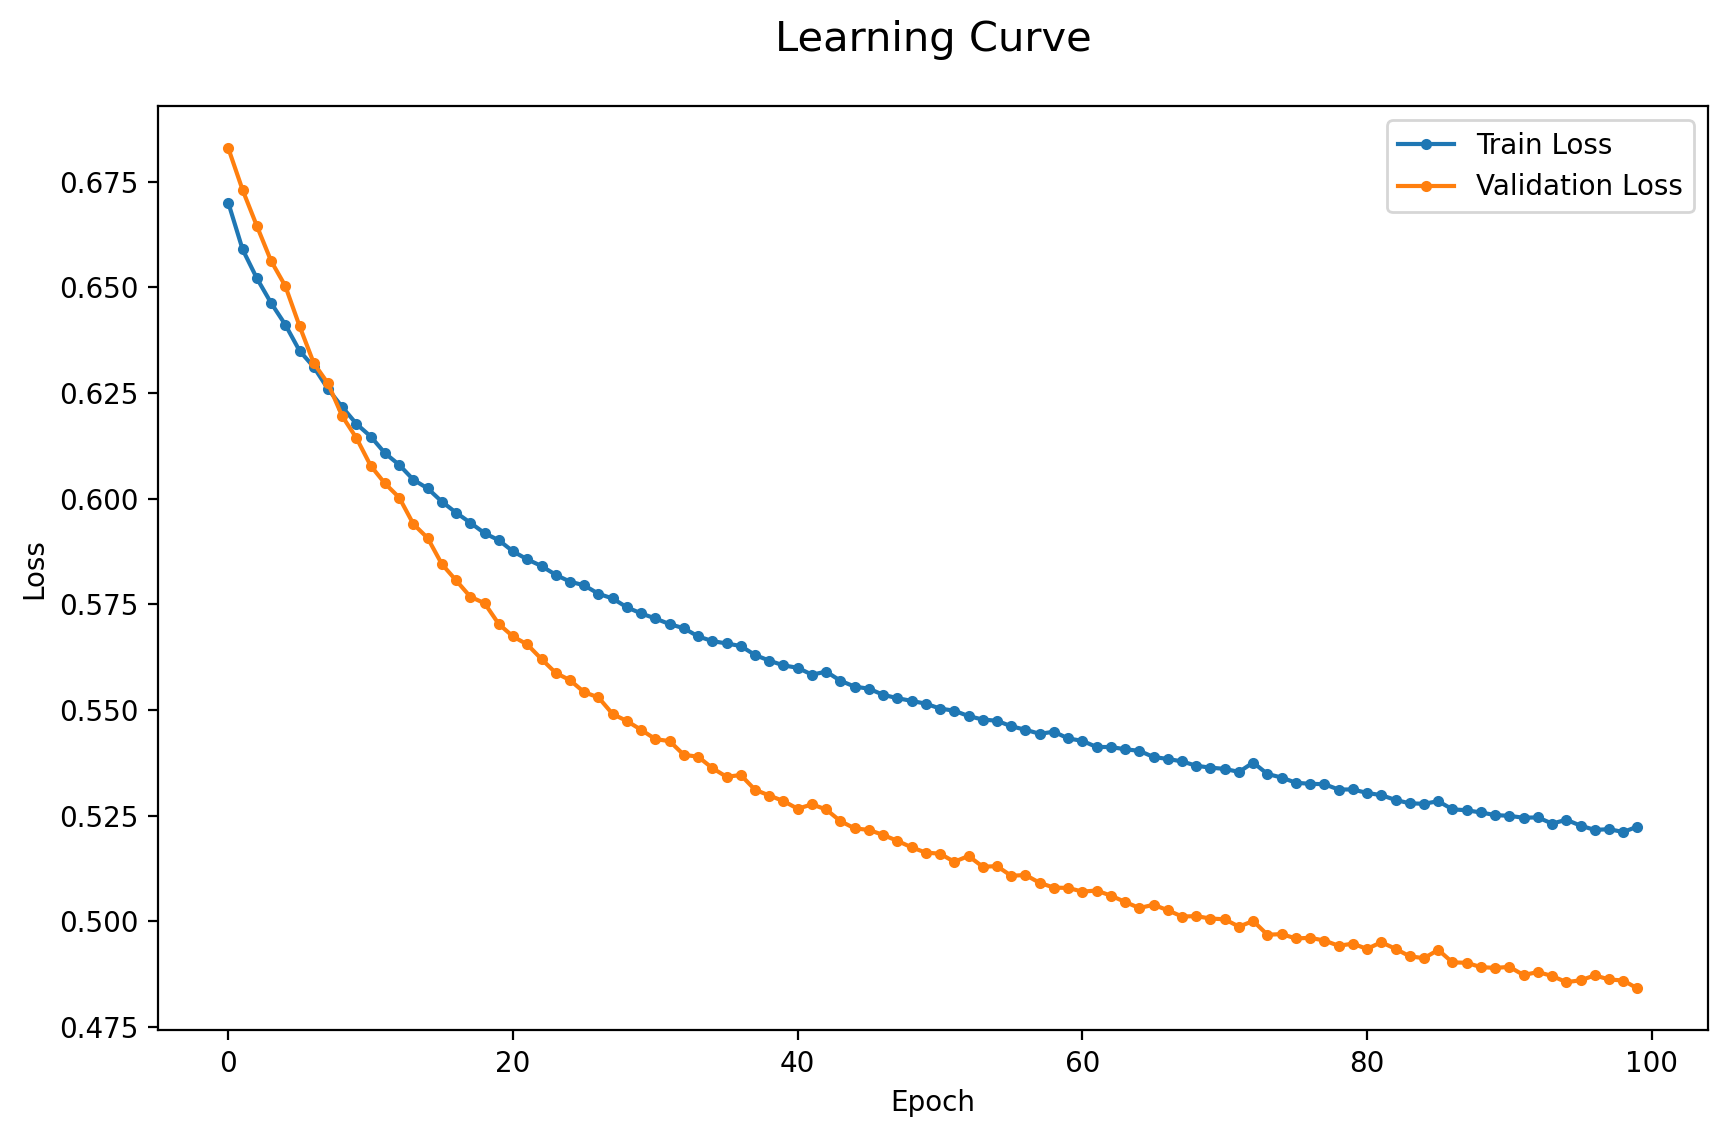

In [28]:
# 학습 곡선
dl_history_plot(hist)

### (3) 예측 및 성능 평가

In [33]:
# 예측
y_pred = model.predict(x_val)
y_pred = (0.5 > y_pred).astype(int)
y_pred[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0],
       [1],
       [1],
       [1],
       [1]])

In [30]:
# 성능 평가
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.07      0.11        99
           1       0.25      0.55      0.34        55

    accuracy                           0.24       154
   macro avg       0.23      0.31      0.22       154
weighted avg       0.23      0.24      0.19       154



## **6. 모델링 3: Hidden Layer**

- 이제 레이어를 추가해 봅니다.

### (1) 모델 선언

In [ ]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언




# 모델 요약
model.summary()

### (2) 모델 학습

In [ ]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss= )

In [ ]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=0).history

In [ ]:
# 학습 곡선
dl_history_plot(hist)

### (3) 예측 및 성능 평가

In [ ]:
# 예측
y_pred = model.predict(x_val)
y_pred =

In [ ]:
# 성능 평가
print(classification_report(y_val, y_pred))

## **7. 모델링 4: 실습**

- 다음 Summary를 보고 모델을 설계합니다.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

### (1) 모델 선언

In [36]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x_train.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

### (2) 모델 학습

In [37]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'binary_crossentropy')

In [38]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2, verbose=0).history

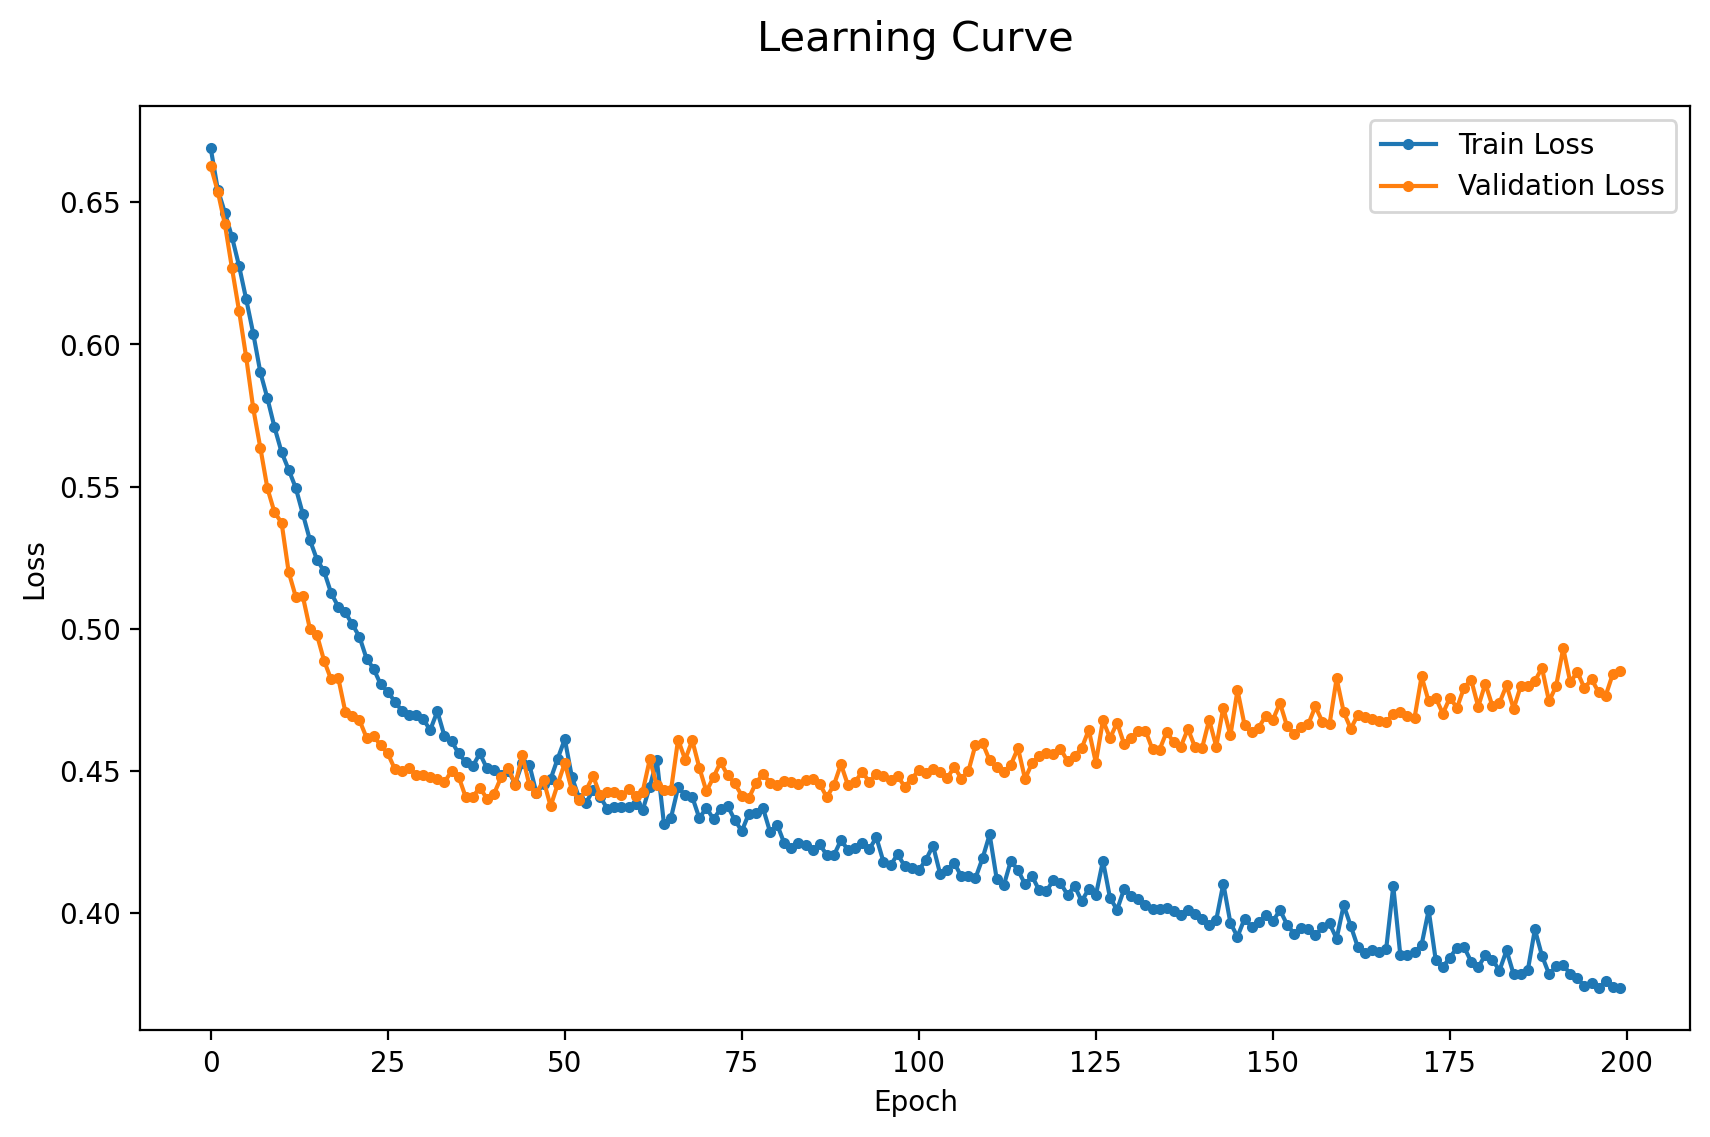

In [39]:
# 학습 곡선
dl_history_plot(hist)

### (3) 예측 및 성능 평가

In [43]:
# 예측
y_pred = model.predict(x_val)
y_pred = (0.5>y_pred).astype(int)
y_pred[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[1],
       [1],
       [1],
       [1],
       [1]])

In [41]:
# 성능 평가
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.11      0.15        99
           1       0.20      0.40      0.27        55

    accuracy                           0.21       154
   macro avg       0.23      0.26      0.21       154
weighted avg       0.23      0.21      0.19       154

